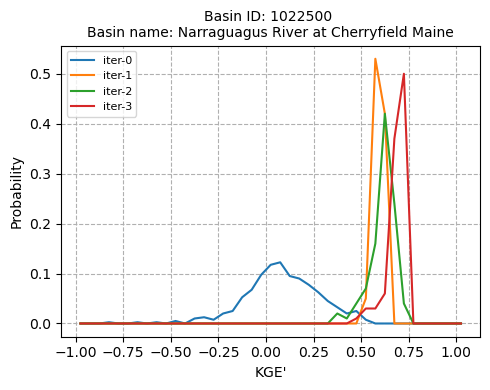

In [36]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cal_pdf(d, bins):
    d1 = []
    d2 = []
    for i in range(len(bins)-1):
        ind = (d>=bins[i]) & (d<=bins[i+1])
        d1.append(np.sum(ind)/len(d))
        d2.append((bins[i]+bins[i+1])/2)

    return np.array(d1), np.array(d2)


file_level1 = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info_supplment.csv'
df_info = pd.read_csv(file_level1)

# Define the file path pattern for the CSV files
# basin = 240
basin = 1


iternum = 4
inpath = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange'
bid = df_info.iloc[basin]['site_no']
bnm = df_info.iloc[basin]['station_nm']

# Get all CSV files matching the pattern
csv_files = []
for i in range(iternum):
    csv_files.append(f'{inpath}/level1_{basin}_MOASMOcalib/ctsm_outputs_normKGE/iter{i}_many_metric.csv')

# Create a figure for the scatter plot
fig, ax = plt.subplots(figsize=(5, 4))

bins = np.arange(-1, 1.1, 0.05)
# Loop over each CSV file and plot the scatter plot of mae vs mmae
for i in range(iternum):
    file = csv_files[i]
    # Read the CSV file
    df = pd.read_csv(file)
    d1, d2 = cal_pdf(df['kge'].values, bins)
    ax.plot(d2, d1, label=f'iter-{i}', )

# Set plot labels and title
ax.set_xlabel(f"KGE'") 
ax.set_ylabel(f"Probability") 
ax.set_title(f'Basin ID: {bid} \nBasin name: {bnm}', fontsize=10)

# Add legend with file names (iter0, iter1, iter2, iter3)
ax.legend(loc='best', fontsize=8)
ax.grid('on',linestyle='--')

# Display the plot
plt.tight_layout()
# plt.show()

# Optionally, save the plot as an image
plt.savefig(f'kge_pdf_{basin}_{bid}.png', dpi=600, bbox_inches='tight', pad_inches=0)
